# Classification Tree in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Simple Decision Tree

We will start by setting up a simple Classification Problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total**    

Extract the variables and the associated data as a Pandas `DataFrame`.

In [5]:
legnd = pd.DataFrame(pkmndata['Legendary'])  # Response
total = pd.DataFrame(pkmndata['Total'])      # Predictor

Set up the classification problem with Train and Test datasets.   
Train Set with 600 samples and Test Set with 200 samples.

In [6]:
# Train Set : 600 samples
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

# Test Set : 200 samples
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd[-200:])

# Check the sample sizes
print("Train Set :", legnd_train.shape, total_train.shape)
print("Test Set  :", legnd_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [7]:
type(legnd_train["Legendary"])

pandas.core.series.Series

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [8]:
# Summary Statistics for Legendary Train
legnd_train["Legendary"].value_counts()

Legendary
False    557
True      43
Name: count, dtype: int64

In [9]:
# Summary Statistics for Total Train
total_train.describe()

,Total
count,600.000000
mean,432.715000
std,122.365283
min,180.000000
25%,325.000000
50%,440.000000
75%,515.000000
max,780.000000


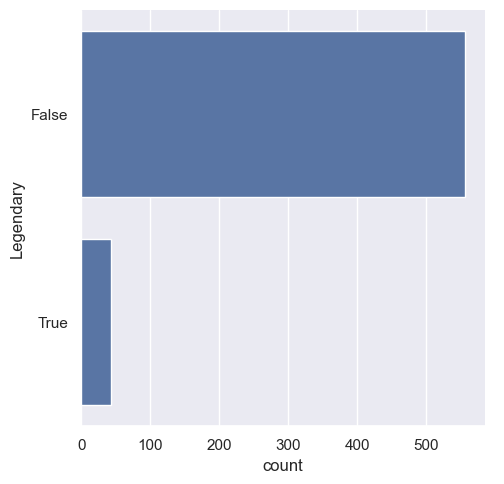

In [10]:
# Count Plot for Legendary Train
sb.catplot(y = "Legendary", data = legnd_train, kind = "count")

<Axes: >

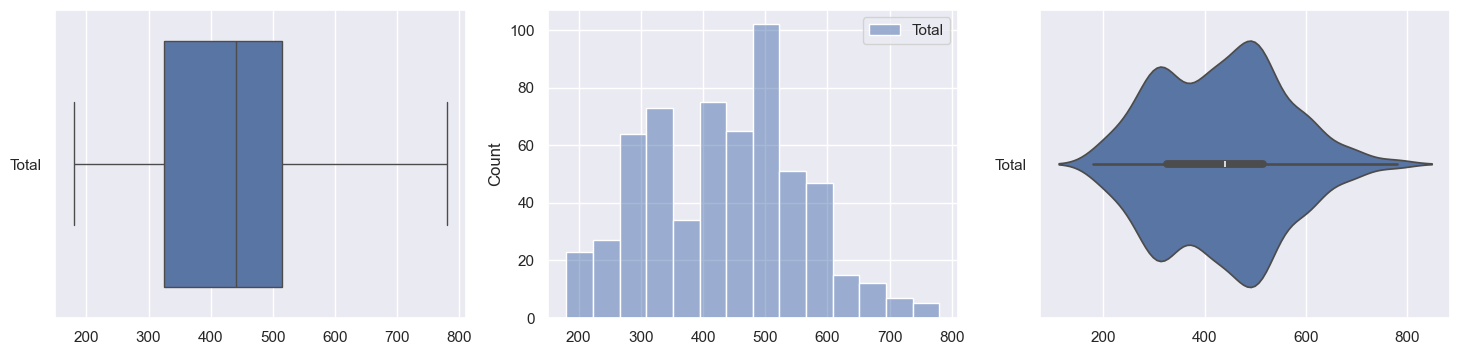

In [11]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(data = total_train, orient = "h", ax = axes[0])
sb.histplot(data = total_train, ax = axes[1])
sb.violinplot(data = total_train, orient = "h", ax = axes[2])

<Axes: xlabel='Total', ylabel='Legendary'>

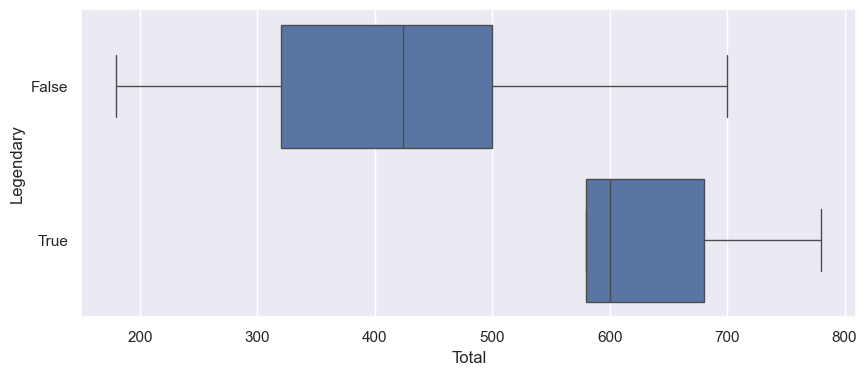

In [12]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([total_train, legnd_train], axis = 1).reindex(total_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(10, 4))
sb.boxplot(x = "Total", y = "Legendary", data = trainDF, orient = "h")

<Axes: xlabel='Total', ylabel='Legendary'>

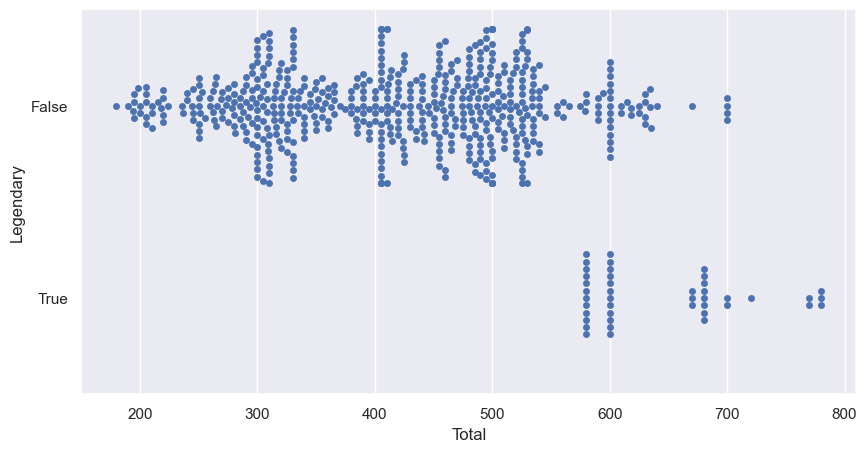

In [13]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([total_train, legnd_train], axis = 1).reindex(total_train.index)

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(10, 5))
sb.swarmplot(x = "Total", y = "Legendary", data = trainDF, orient = "h")

#### Decision Tree in Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [14]:
# We import the specific model class we need. 
# 'tree' is the module, 'DecisionTreeClassifier' is the specific algorithm.
from sklearn.tree import DecisionTreeClassifier


# We create a variable 'dectree' to hold our model.
# max_depth = 2: This is a "Hyperparameter". It limits how many questions
# the tree can ask (how deep it grows). We limit it to prevent the model
# from memorizing the data perfectly (overfitting) and to keep the plot readable.
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `total_train` as *Predictor* and `legnd_train` as *Response*.

In [15]:
# .fit() is the magic command. It triggers the learning process.
# Input 1 (total_train): The features (The questions the model can ask).
# Input 2 (legnd_train): The target (The correct answers).
# The model looks for patterns: "If Total is high, is it usually Legendary?"
dectree.fit(total_train, legnd_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Plotting using plot_tree() in the module sklearn.tree for you to visualize the decision tree. As sklearn comes with Anaconda, you do not need to install additional packages. The function plot_tree is less flexible, but it suffices for our purposes.

Generic Visual Guide
- **Root Node (Top)**: The first and most important question the data asks (e.g., "Is Total <= 585?")
- **Gini**: A measure of "impurity". 0.0 means that the bucket is pure (all items are the same class). We want the Gini to be low.
- **Samples**: How many pkmn made it to this box
- **Value**: The split of counts, e.g., `[400,200]` means 400 Non-Legendary and 20 Legendary
- **Class**: The majority vote. If a pkmn lands here, this is the prediction.

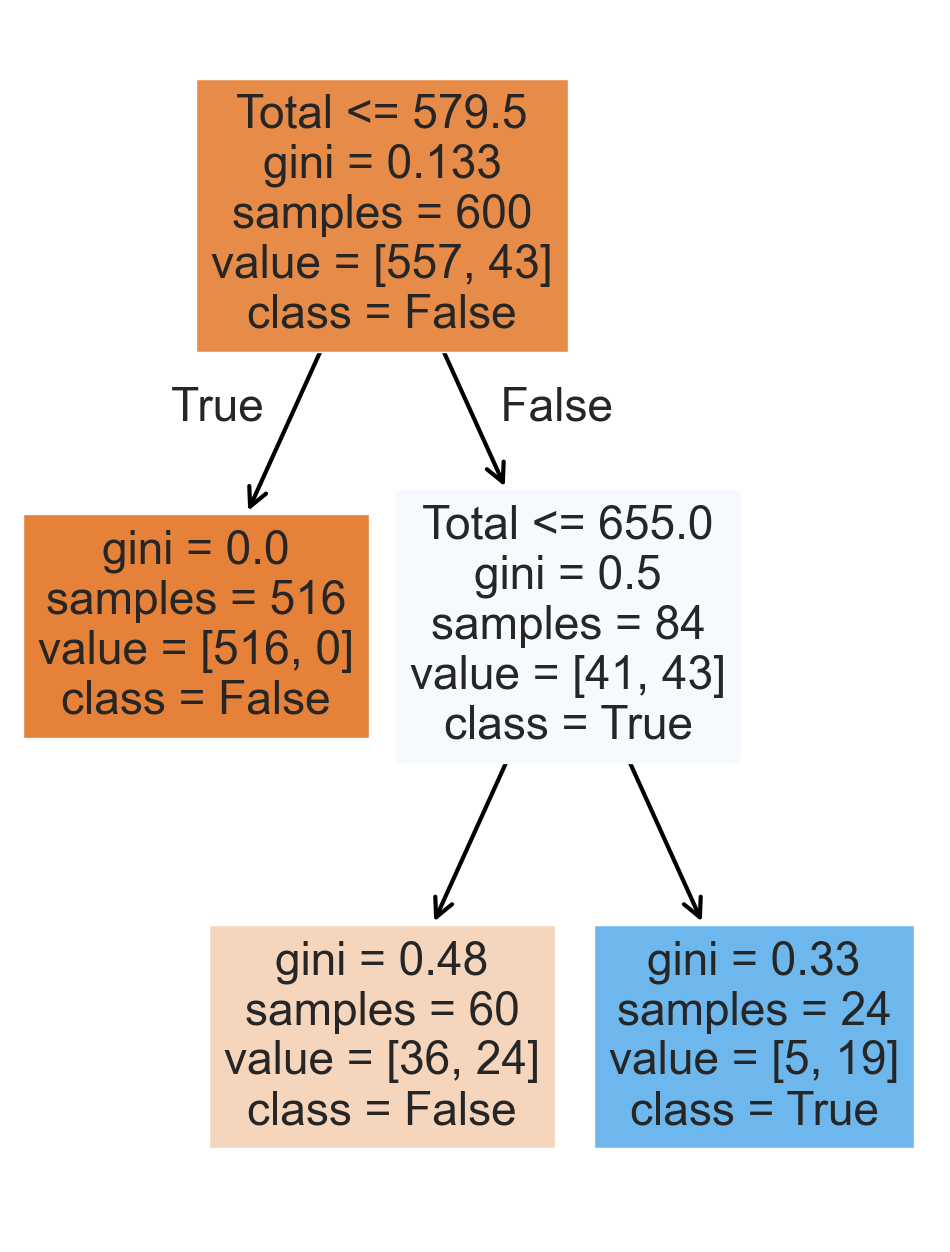

In [16]:
from sklearn.tree import plot_tree

# Create a large figure so the text is legible
fig, ax = plt.subplots(figsize=(12, 16))

# plot_tree function visualizes the logic.
out = plot_tree(dectree, 
          # feature_names: Labels the questions (e.g., "Total <= 500")
          feature_names = total_train.columns.tolist(),
          # class_names: Labels the final answers (False = Not Legendary, True = Legendary)
          class_names = [str(x) for x in dectree.classes_],
          # filled: Colors the nodes based on the majority class (Pure colors = high confidence)
          filled=True)

# (Optional cosmetic code to make arrows darker)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.9516666666666667


<Axes: >

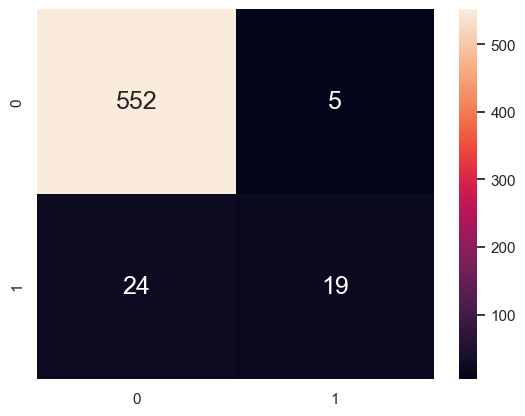

In [17]:
# We ask the fitted model to predict labels for our training data.
# This helps us see if it learned the material we taught it.
legnd_train_pred = dectree.predict(total_train)

# .score() compares the predictions against the actual answers and returns a percentage.
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Compare Actuals (legnd_train) vs Predictions (legnd_train_pred)
cm = confusion_matrix(legnd_train, legnd_train_pred)

# Visualize with a Heatmap
# fmt=".0f": Format as whole numbers (no decimals)
# annot=True: Write the numbers inside the boxes
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.935


<Axes: >

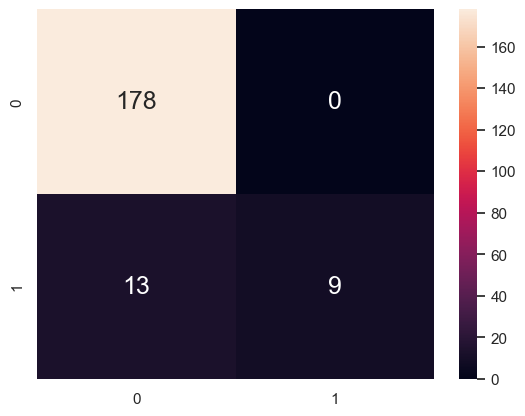

In [18]:
# We ask the fitted model to predict labels for our training data.
# This helps us see if it learned the material we taught it.
legnd_test_pred = dectree.predict(total_test)

# .score() compares the predictions against the actual answers and returns a percentage.
print("Classification Accuracy \t:", dectree.score(total_test, legnd_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Compare Actuals (legnd_test) vs Predictions (legnd_test_pred)
cm = confusion_matrix(legnd_test, legnd_test_pred)

# annot=True: Write the numbers inside the boxes
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

### Notes

Model Evaluation (Accuracy vs. Confusion): Corresponds to the "Goodness of Fit of the Model"
- **Accuracy**: The % of correct answers. 
- **Conf. Matrix**: A grid that shows *where* the model makes mistakes. It distinguishes between False Positives (Predict 1 when 0) and False Negatives (Predict 0 when 1).

FYI: Just know that accuracy can be misleading. Let's say 95% of Pokemon are NOT legendary. A model that guesses "Not Legendary" for everything still has 95% accuracy, but it is technically useless. So again, accuracy is highly *context-dependent*.

#### Classification Tree with Random Train-Test Split

Split the Train and Test sets randomly, and perform Classification.

#### In case some of you are still confused

We cannot test a student with the exact same questions they studied for in the exam, as they would just memorize the answers. 

**Similarly**, we cannot evaluate a model on the data it was **trained on**. We must split the data into:
- **Training Set**: Used to learn. In this case, we set aside 75% of the data for this. [LAMS]
- **Test Set**: Used to evaluate the performance on *unseen* data. [FINALS]

**FYI**
- **Training Accuracy**: Can see it as how well the model memorize the data
- **Test Accuracy**: How well did the model generalize? Usually, *TEST* score matters more.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9433333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.93



<Axes: >

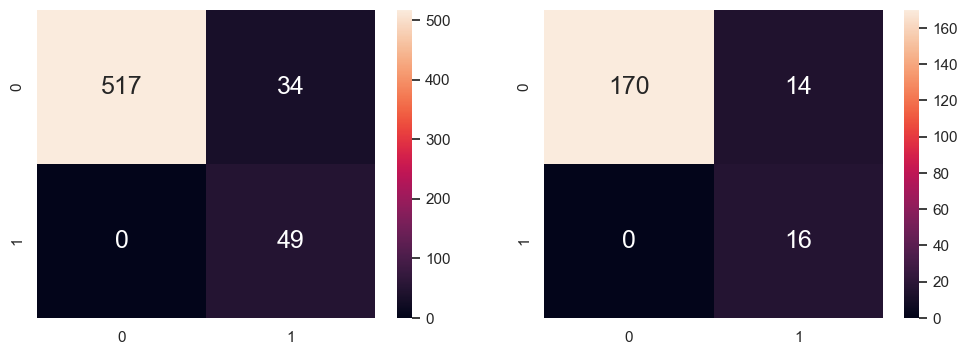

In [19]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['Legendary'])   # Response
total = pd.DataFrame(pkmndata['Total'])       # Predictor

# train_test_split performs a random shuffle and split.
# test_size=0.25: Hold back 25% of data for the final exam (Testing).
# It returns 4 chunks of data, which we unpack into variables.
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

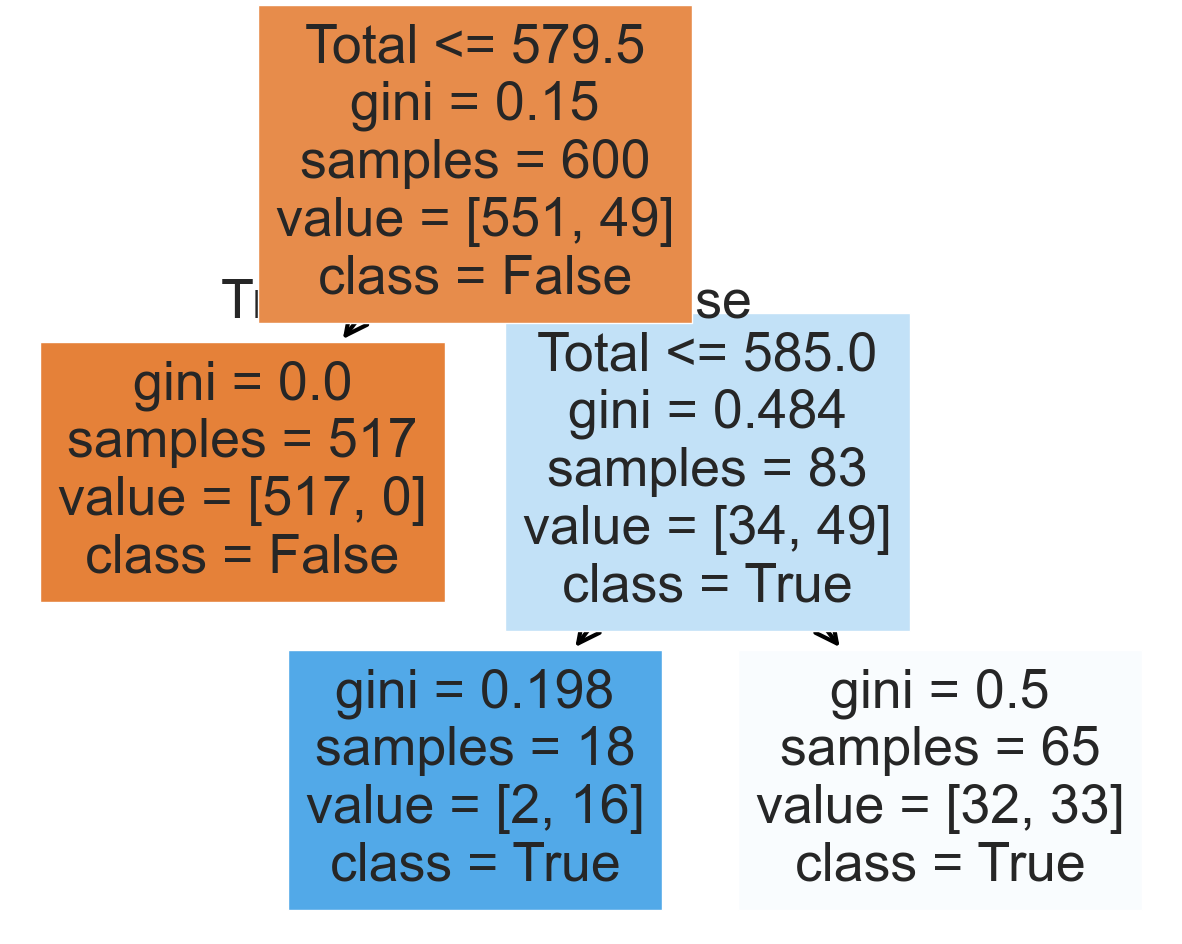

In [20]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

---

## Multi-Variate Classification Tree

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [21]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Legendary"])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense"]])

Set up the classification problem with Train and Test datasets.   

In [22]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (600, 1) (600, 4)
Test Set  : (200, 1) (200, 4)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [23]:
# Summary Statistics for Response
y_train["Legendary"].value_counts()

Legendary
False    552
True      48
Name: count, dtype: int64

In [24]:
# Summary Statistics for Predictors
X_train.describe()

,Total,HP,Attack,Defense
count,600.000000,600.000000,600.000000,600.000000
mean,434.308333,69.641667,78.718333,73.375000
std,118.385409,25.842271,31.798599,31.248923
min,180.000000,1.000000,5.000000,5.000000
25%,330.000000,54.000000,55.000000,50.000000
50%,450.000000,68.000000,75.000000,70.000000
75%,505.500000,80.000000,100.000000,90.000000
max,780.000000,255.000000,190.000000,230.000000


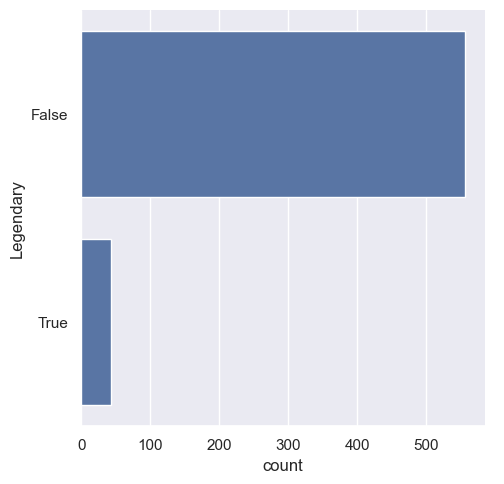

In [25]:
# Draw the distribution of Response
sb.catplot(y = "Legendary", data = legnd_train, kind = "count")

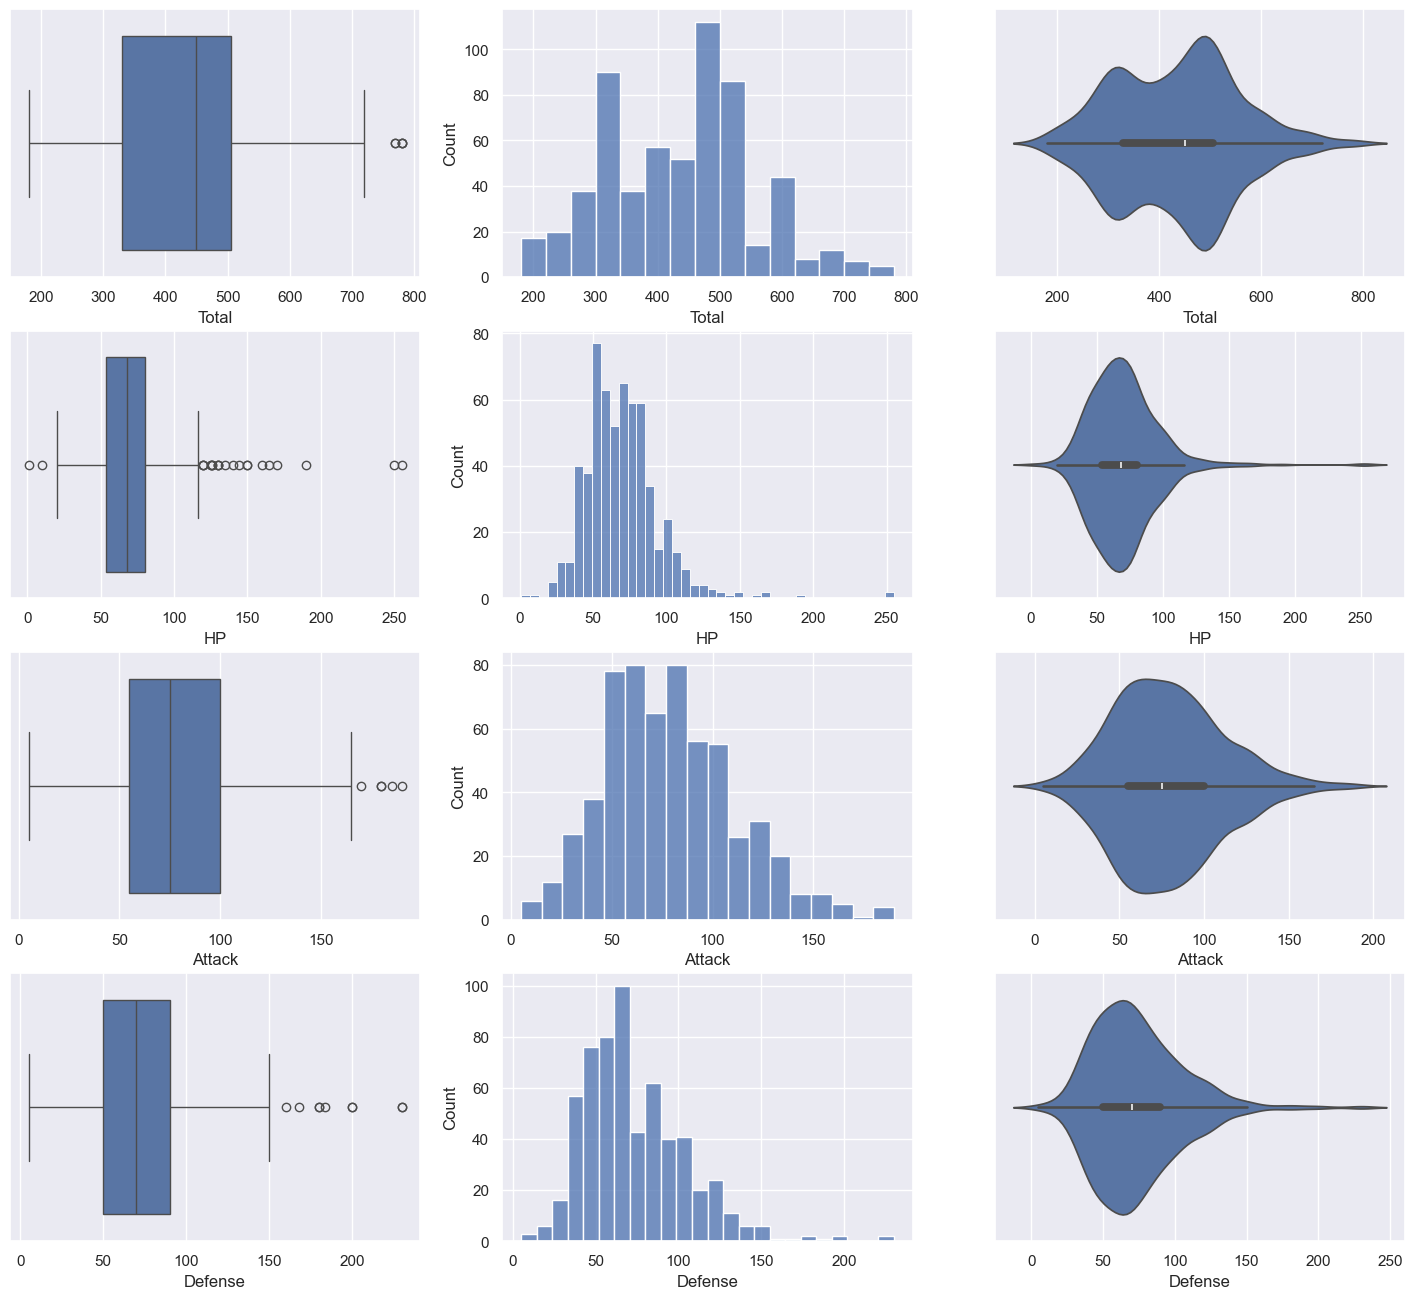

In [26]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

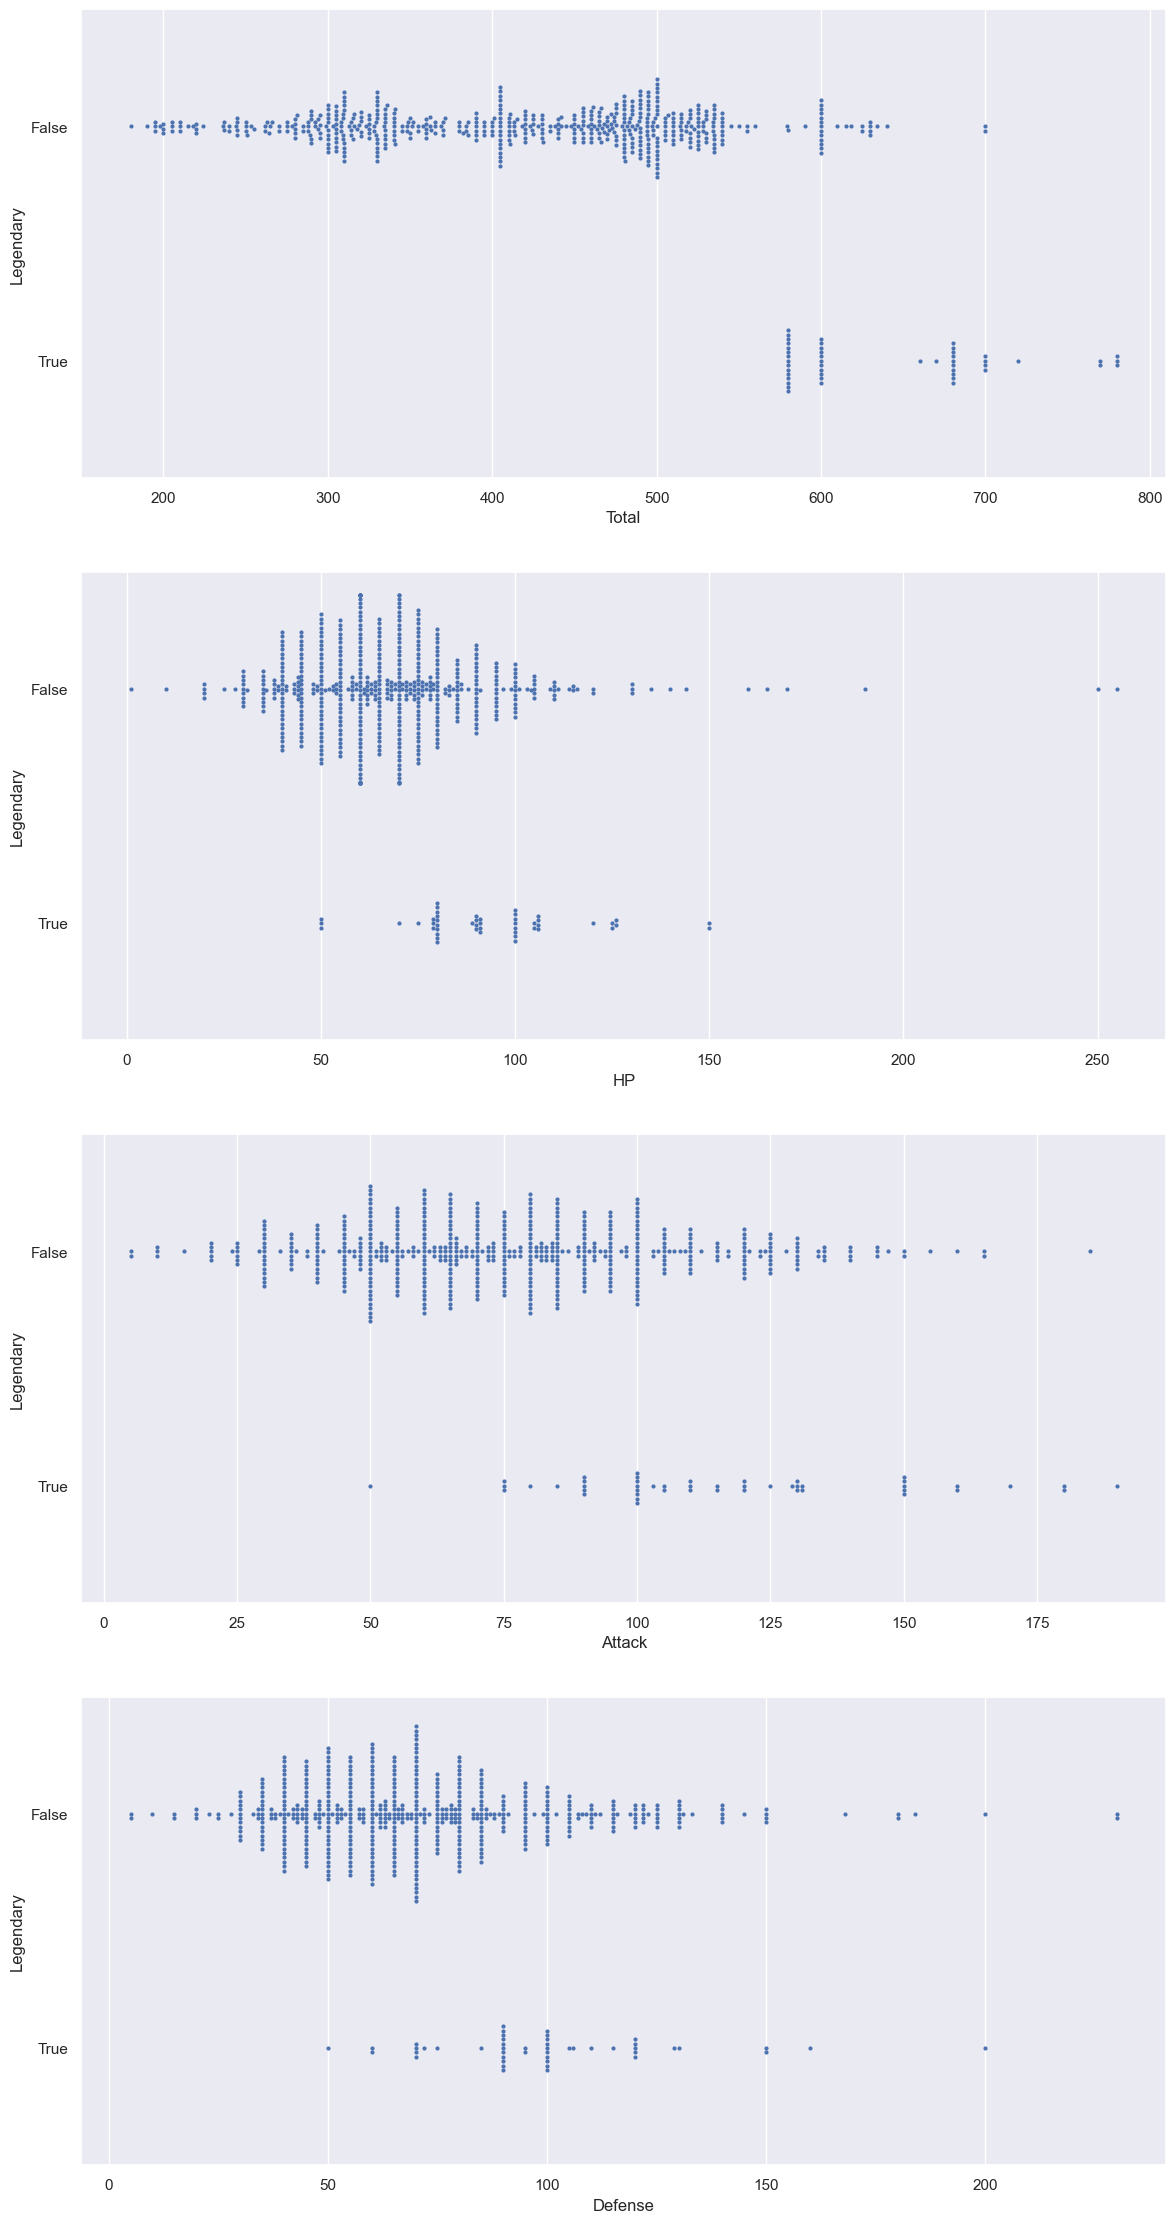

In [27]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(14,28))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "Legendary", data = trainDF, orient = "h", size = 3, ax = axes[count])
    count += 1

#### Classification Tree in Scikit-Learn

Note that the workflow is identical, which is great for you. 

Using sklearn, the syntax doesn't change that much when the complexity increases.

In [28]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


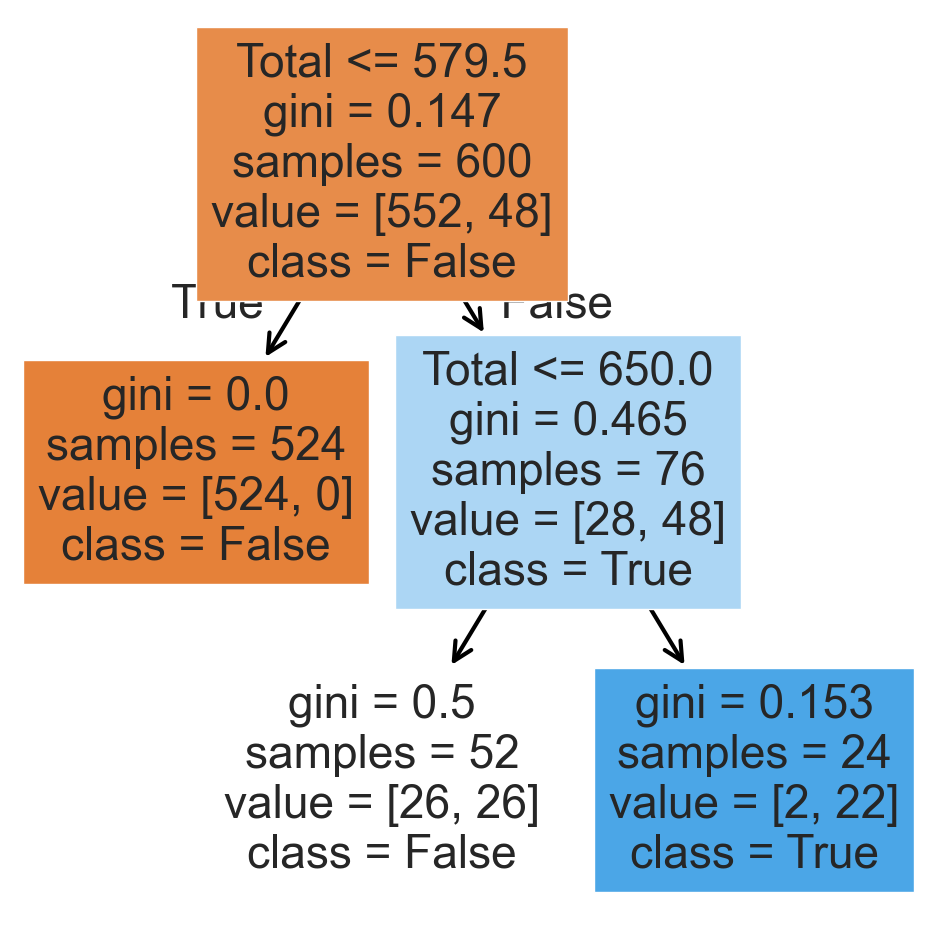

In [29]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### Goodness of Fit of the Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9533333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.93



<Axes: >

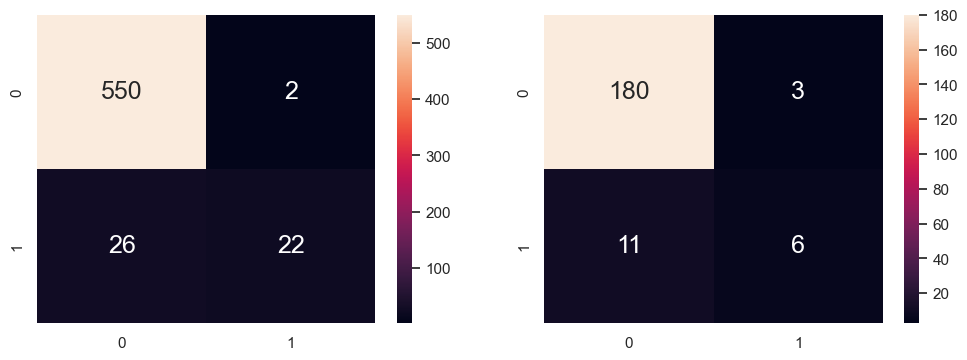

In [30]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---

## Multi-Variate Classification Tree

Let us set up another Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.96

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.91



<Axes: >

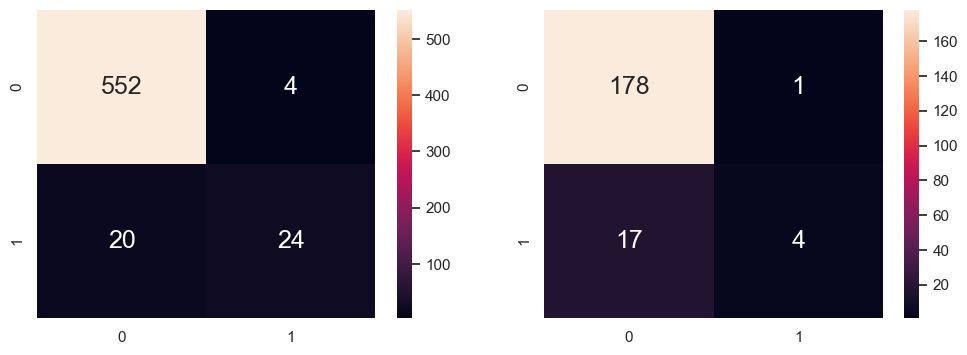

In [31]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(pkmndata['Legendary'])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

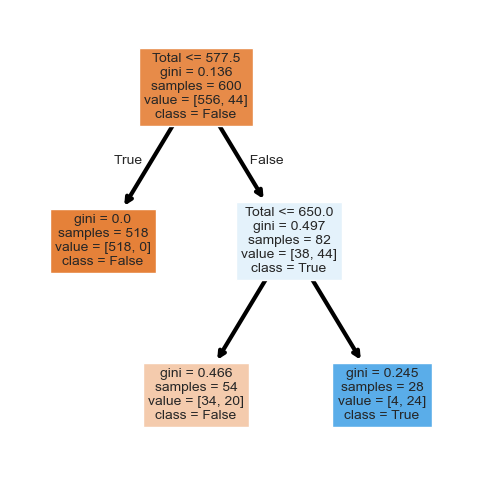

In [32]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(6, 6))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True, fontsize=10)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

---

## Prediction using a Classification Tree

Once we have trained a Multi-Variate Classification Tree, we may use it to predict **Legendary** for any particular Pokemon.   

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.97

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.955



<Axes: >

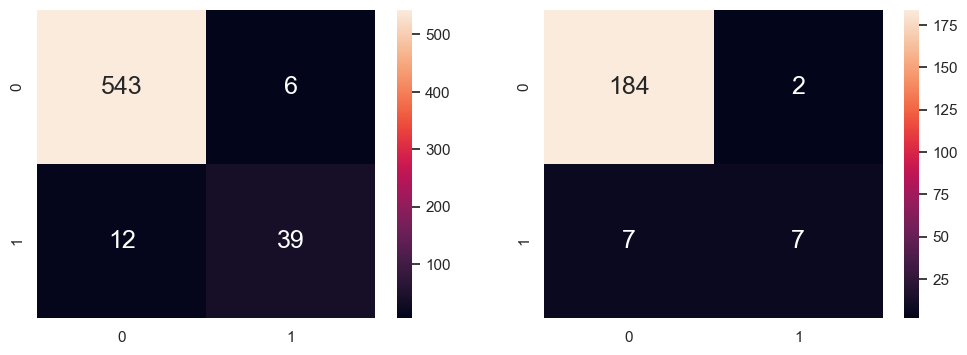

In [33]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Legendary'])
X = pd.DataFrame(pkmndata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

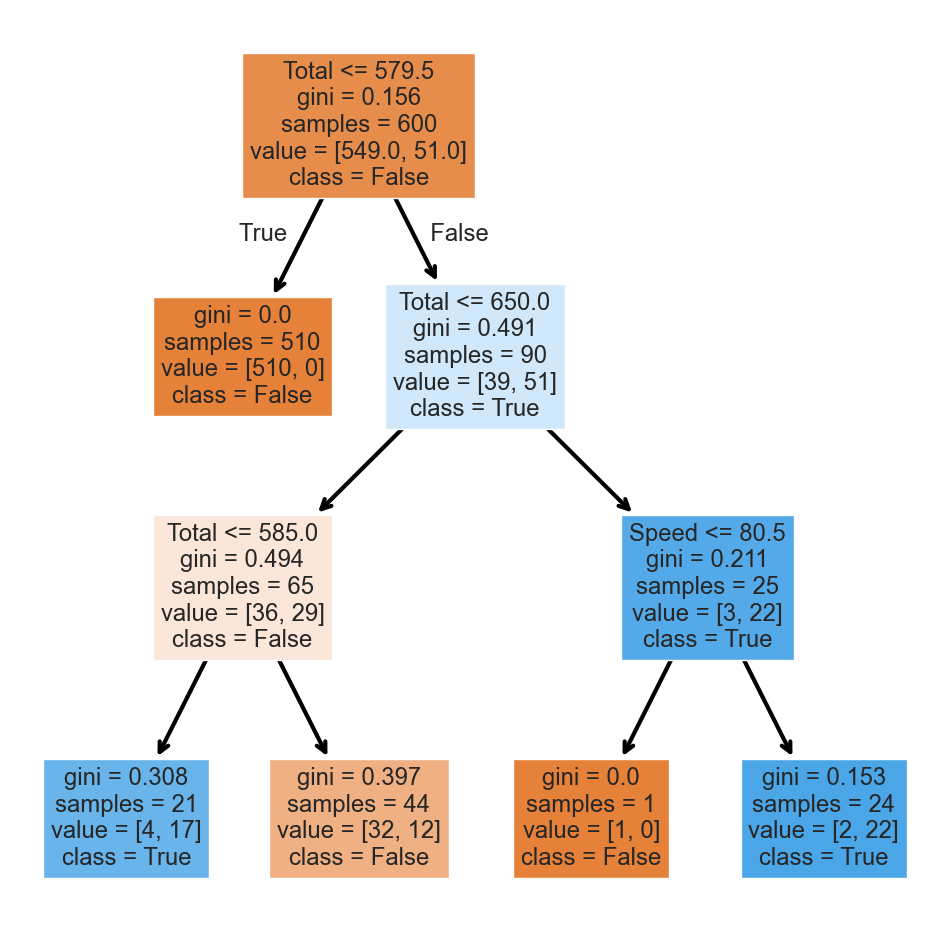

In [34]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### Notes

At this point, take note of this 3-layer vs 2-layer decision tree that we got when we used ALL possible variables. 

**Tree 1**
- We set `max-depth=2`, which forces the tree to stop growing after just two levels of questions
- For the **Root Question**, the tree analyzed all input variables (`Total`, `HP`, etc.) and decided that **Total** is the single best predictor of whether a Pkmn is legendary. 
- Can be considered 'under-fitting' slightly. It is simple and easy to interpret, but perhaps too simple *(Number big --> Legendary)*

**Tree 2**
- Set `max_depth=3`, allowing the model to ask extra layers of follow-up questions compared to the first tree.
- The **Root Question** typically starts with `Total` again.
- Note the subsequent boxes. After determining a Pkmn is strong (high `Total`), it asks `Sp. Atk <= 71.0`. If `Sp. Atk` low, asks for `Atk <=112.5`, and `Sp Def. <= 128.5` if high.
- The tree is now more *nuanced*. It realized that raw power (`Total`) is not the *only factor*. It is now looking at specific stats. 

**TLDR**
- **Depth = Complexity**: Increasing depth allows the model to handle "edge cases", but too much depth leads to memorization (overfitting).
- **Feature Importance**: Even though we gave the model 7 different stats, both trees prioritized `Total` at the top. The algorithm automatically *ranks* variables. It realized that stats like `Spd` or `Def.` are 'weaker questions' than `Total`. It ignores variables that doesn't help it to solve the question (legendary or not)

#### Prediction of Legendary

Let's predict the value of **Legendary** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [35]:
# Isolate the specific Pokemon we want to test
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [36]:
# Extract ONLY the features the model was trained on.
# (If the model trained on 'HP' and 'Attack', you must provide 'HP' and 'Attack')
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict the Class (True/False)
y_pred = dectree.predict(X_pred)
y_pred

array([False,  True,  True])

In [37]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredLegend"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Legendary"]], y_pred], axis = 1)

pkmndata_acc

,Name,Legendary,PredLegend
15,Butterfree,False,False
162,Mewtwo,True,True
545,GiratinaOrigin Forme,True,True


#### Prediction of Class Probabilities

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [38]:
# Predict the Probability (Confidence)
# This returns two numbers for each Pokemon: [Prob(False), Prob(True)]
# e.g., [0.1, 0.9] means 90% sure it IS Legendary.
y_prob = dectree.predict_proba(X_pred)
y_prob

array([[1.        , 0.        ],
       [0.08333333, 0.91666667],
       [0.08333333, 0.91666667]])

In [39]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProbLegend"], index = pkmndata_pred.index)
pkmndata_conf = pd.concat([pkmndata_acc, y_prob], axis = 1)

pkmndata_conf

,Name,Legendary,PredLegend,ProbLegend
15,Butterfree,False,False,0.000000
162,Mewtwo,True,True,0.916667
545,GiratinaOrigin Forme,True,True,0.916667


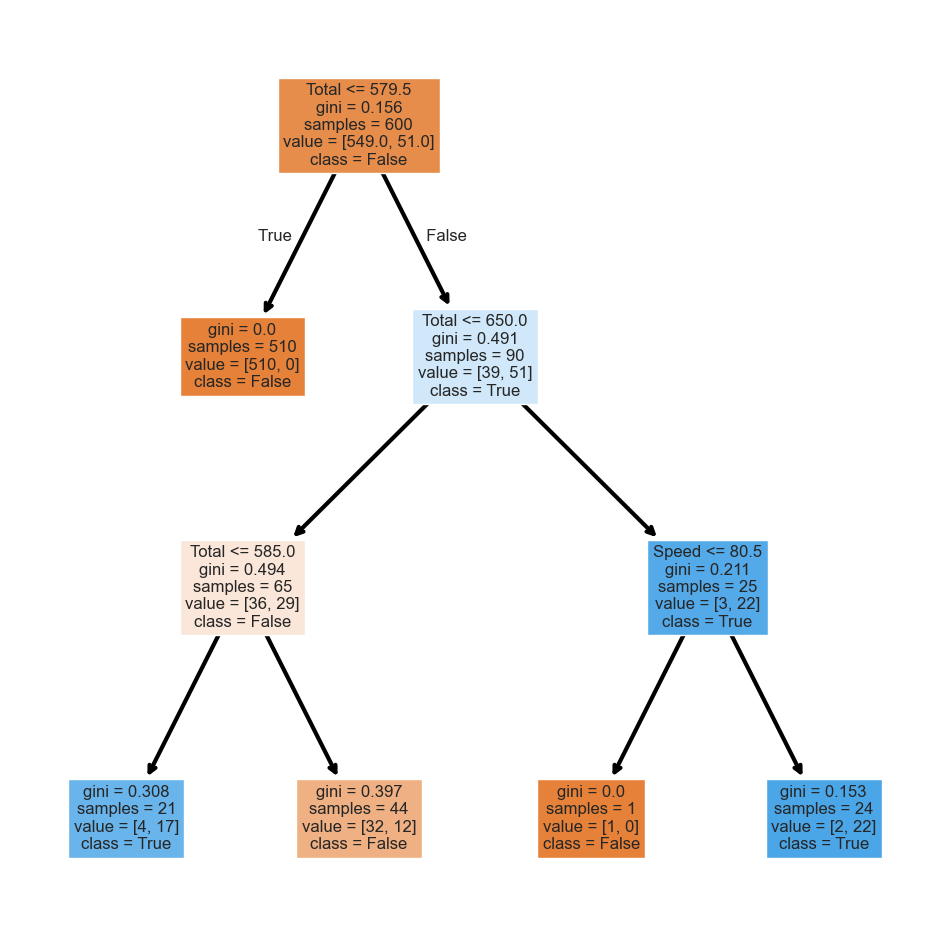

In [40]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True, fontsize=12)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

---

## Multi-Class Classification Tree

Let us set up a Multi-Class Classification problem.   

Response Variable : **Type 1**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

Previously, we did **Binary Classification** (Yes/No). Now, we extend this concept to **Multi-Class Classification** (Grass vs. Fire vs. Water vs...). 
- The tree will be much larger and messier
- Random guessing with still result in ~5% accuracy, so even a 20-30% accuracy is an improvement over chance, though still *difficult*.

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Type 1'].astype('category'))
X = pd.DataFrame(pkmndata[predictors]) 

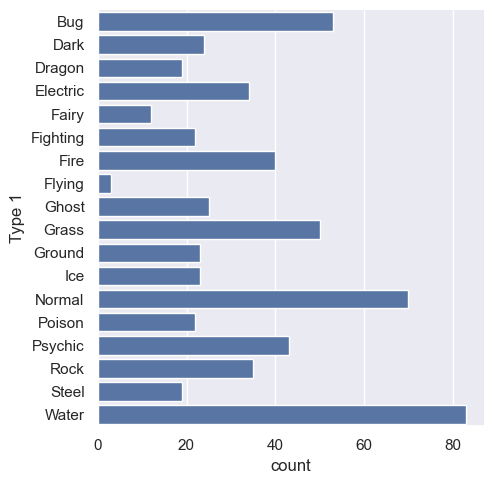

In [42]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Type 1", data = y_train, kind = "count")

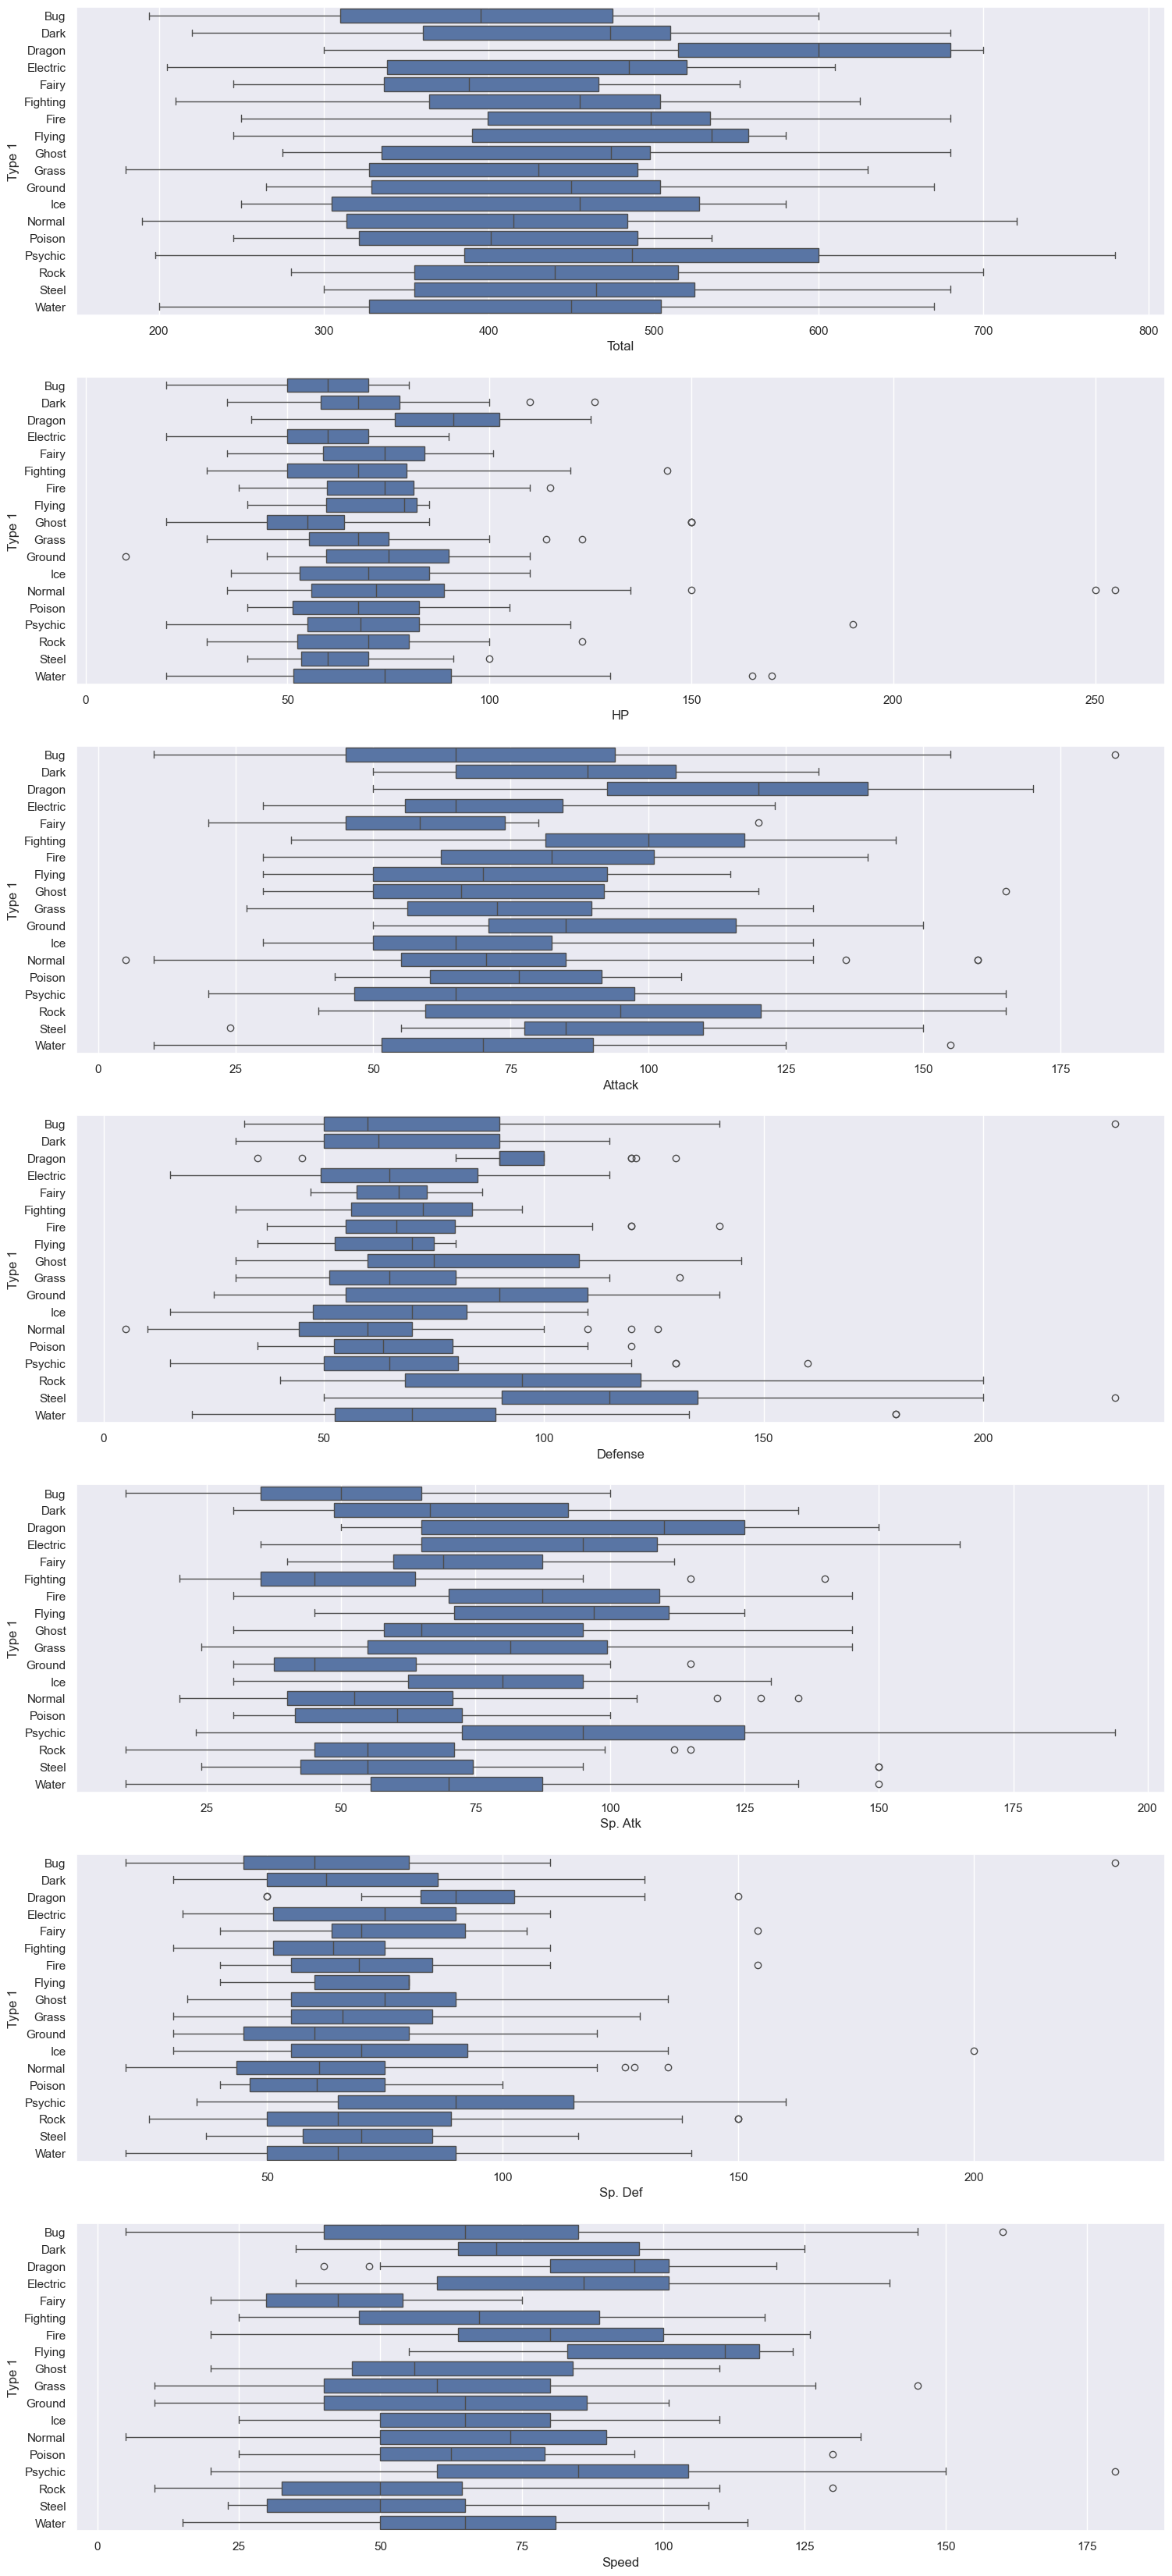

In [43]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Type 1", data = trainDF, orient = "h", ax = axes[count])
    count += 1

#### Training the Decision Tree

In [44]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [45]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.2833333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.215



Observe the Confusion Matrix:
- It is now a giant grid (18x18). 
- The diagonal line from top-left to bottom-right shows correct predictions.
- Off-diagonal numbers show specific confusions (e.g., mistaking Rock for Ground).

<Axes: >

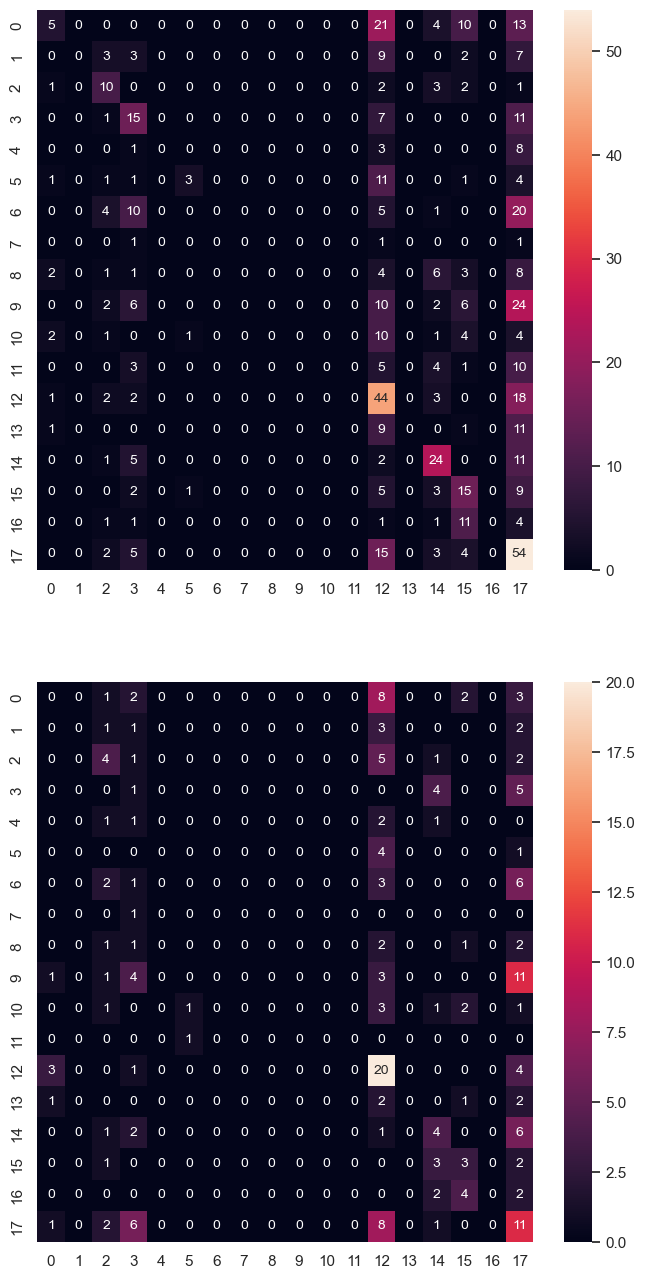

In [46]:

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(8, 16))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

#### Prediction of Type 1

Let's predict the value of **Type 1** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [47]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [48]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Psychic', 'Dragon', 'Dragon'], dtype=object)

In [49]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Type 1"]], y_pred], axis = 1)

pkmndata_acc

,Name,Type 1,PredType
15,Butterfree,Bug,Psychic
162,Mewtwo,Psychic,Dragon
545,GiratinaOrigin Forme,Ghost,Dragon


#### Prediction of Class Probabilities

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [50]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.074 0.    0.    0.    0.    0.    0.037 0.    0.185 0.037 0.    0.148
  0.    0.    0.444 0.037 0.    0.037]
 [0.    0.103 0.345 0.034 0.    0.034 0.138 0.    0.034 0.069 0.034 0.
  0.069 0.    0.034 0.    0.034 0.069]
 [0.    0.103 0.345 0.034 0.    0.034 0.138 0.    0.034 0.069 0.034 0.
  0.069 0.    0.034 0.    0.034 0.069]]


---

### **Explaination of Classification Trees**

#### **How it works**
Building a flowchart of Yes/No questions to separate your data into distinct classes (e.g., Legendary vs Non-Legendary, Is it a Water Type?).

The core logic of the algorithm is figuring out **which question to ask first**. When you run `dectree.fit()`:
- You look at every single column (HP, Attack, Speed, etc.)
- Try every single possible cutoff value for those columns (e.g., HP > 10? HP > 11?)
- Calculate which of those thousands of potential splits resulted in the *"cleanest"* groups

**In terms of Pokemon**:
- `Total <=600` was the single best question to separate legendary from non-legendary pkmn.

#### **Measuring Success**
You use a metric called the *Gini Impurity* to define "cleanest" or "best"

Consider a bowl of 100 marbles (50 red, 50 blue)
- This bowl is **impure**. If you reach in and grab one blindly, you have no idea what you get (**High Gini Score**).

If you insteaed separate them into **Bowl A** (50 red, 0 blue), and **Bowl B** (0 red, 50 blue). These bowls are **pure**. If you reach into **Bowl A**, you know you will get a Red marble *(Gini Score = 0.0)*

With that in mind, note that the goal of the tree is to drive Gini Impurity down to zero. It keeps splitting the data until the "bowls" (leaf nodes) are as pure as possible

**In terms of Pokemon**:
- **Gini = 0.0** means a "perfect leaf". The model found a rule (e.g., "Total <=600") that captured a group of pkmn that were 100% *NOT LEGENDARY*. It does not need to ask any more questions for this group
- **Gini = 0.5**, for instance, means a "messy node". The question did not work perfectly. The group is still a mix of legendary and non-legendary pkmn, meaning we need to ask *another follow-up question*. 

#### **When to use Classification Trees?**
**"White Box" Models**: When you need to explain *why* a decision was made. **In terms of Pokemon**, we know *how* the model/tree made its own decisions.

**Feature Selection**: You have many variables, but suspect only a few matter. The tree will naturally "ignore" the useless variables, and put the important ones on top.

**Refer to your LAMS**.

---

### **Summary**

**Core Concept**: Decision Trees are just asking questions
- Classification Trees are *supervised learning algorithms*. 
- Asking a series of Yes/No questions about the data features to narrow down the options until it can make a guess about the target

**Scikit-Learn Workflow**: Used the `scikit-learn` library 
- **Import**: Bring in the tool (`from sklearn.tree import ...`)
- **Initialize**: Create the empty model (`dectree = DecisionTreeClassifier()`)
- **Fit**: Train the model on training data (`dectree.fit(train_data, train_answers)`)
- **Predict**: Use the model on new data (`dectree.predict(test_data)`)

**Golden Rule**: Train vs. Test. We strictly separate the data into two piles. We never judge a model's performance on the data it has "studied" (Trianing Set). We judge it on data it has never seen before (Testing Set).
- **Training Set**: Used for the model to learn patterns
- **Testing Set**: Used to check if the model actually learned the concept or just memorized the answers.

**Controlling Complexity**: We used `max_depth` to control this tree
- **Shallow** (`max_depth=2`): Simple, easy to read, but might "underfit" (too broad)
- **Deep** (`max_depth=4+`): Captures nuance and edge cases, but risks "overfitting" (memorizing noise) and becomes hard to interpret visually.

**Evaluation**
- **Accuracy**: Total Correct / Total Guesses
- **Conf. Matrix**: This is a *truth-teller*. It shows us exactly *how* the model failed. Did it raise a False Alarm (False Positive), or did it miss a legendary (False Negative)?

**Binary vs. Multi-Class**
- **Binary**: Predicting Yes/No. This tree is simple
- **Multi-Class**: Predicting one of many options (Type 1: Fire, Water, Grass, ...). The tree becomes much larger, and accuracy naturally drops because guessing 1 out of 18 is much harder than guessing 1 out of 2. 

---

### **Cookbook**

You can copy this code block into a new cell to immediately train a tree on any dataset

1. Ensure you have your data loaded into a Pandas DataFrame (e.g., `df`)
2. Change the `TARGET_COL` and `FEATURE_COLS` variables
3. Run the block

Note that I have removed alot of "fluff". This is strictly a *barebones* script you can use. Don't scold me if got any errors thanks

Training Accuracy : 96.17%
Testing Accuracy  : 97.00%


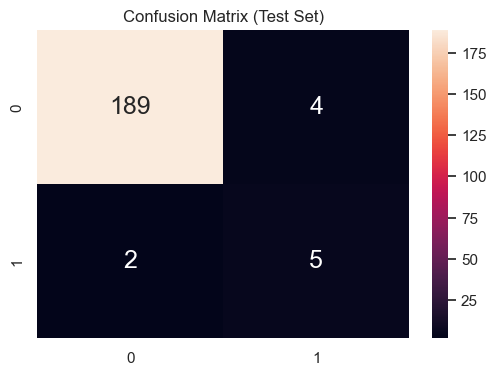

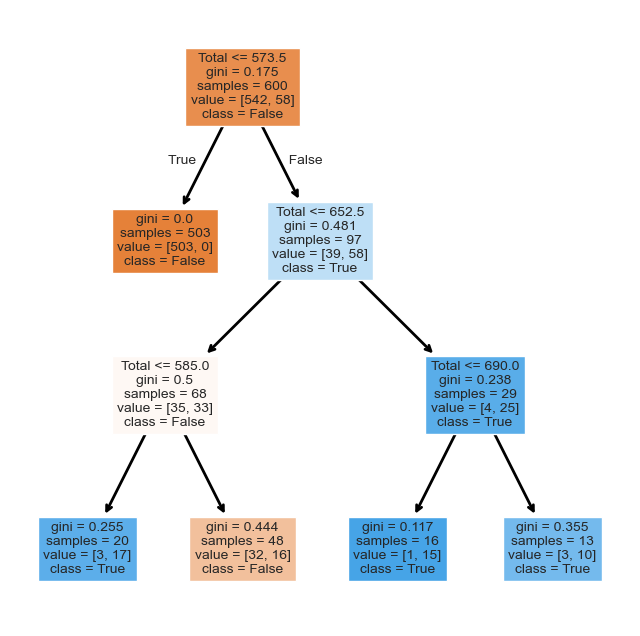

In [391]:
# IMPORTS & PREPARATION
# ------------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# SETUP VARIABLES (EDIT THIS SECTION)
# ------------------------------------------------------------------------------
CSV_FILEPATH = 'pokemonData.csv'  # Filepath of your data .csv file
TARGET_COL = "Legendary"          # What are you trying to predict? (The Y)
FEATURE_COLS = ["Total", "HP"]    # What data do you have? (The X)
TREE_DEPTH = 3                    # How deep should the tree grow?

# Import the data into a dataframe
df = pd.read_csv(CSV_FILEPATH)

# Extract X (Predictors) and y (Response)
X = pd.DataFrame(df[FEATURE_COLS])
y = pd.DataFrame(df[TARGET_COL])

# Split Data (75% Train, 25% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# TRAIN THE MODEL
# ------------------------------------------------------------------------------
# Initialize and Fit
dectree = DecisionTreeClassifier(max_depth=TREE_DEPTH)
dectree.fit(X_train, y_train)

# EVALUATION
# ------------------------------------------------------------------------------
# Scoring
print(f"Training Accuracy : {dectree.score(X_train, y_train):.2%}")
print(f"Testing Accuracy  : {dectree.score(X_test, y_test):.2%}")

# Visualizing the Confusion Matrix (Test Data)
y_test_pred = dectree.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

f, ax = plt.subplots(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.title("Confusion Matrix (Test Set)")
plt.show()

# VISUALIZE THE TREE
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
out = plot_tree(dectree, 
                feature_names = X_train.columns.tolist(),
                class_names = [str(x) for x in dectree.classes_],
                filled=True, 
                fontsize=10)

# Cosmetic: Make arrows darker
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

plt.show()